## Import Packages

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import pylhe

Welcome to JupyROOT 6.20/04


## Define Mass Function

In [2]:
def invariant_mass(p1, p2):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','px','py','pz']))
def transverse_mass(p1):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','pz']))

## Create Mass Lists and a Event List

In [3]:
process_path_MZ_1000 = '/youwei_home/SVJ_py/Week_2/s_channel/SVJ/1000/Events/run_01/unweighted_events.lhe'
process_path_MZ_1500 = '/youwei_home/SVJ_py/Week_2/s_channel/SVJ/1500/Events/run_01/unweighted_events.lhe'
process_path_MZ_2000 = '/youwei_home/SVJ_py/Week_2/s_channel/SVJ/2000/Events/run_01/unweighted_events.lhe'

s_channel_MZ_1000 = pylhe.readLHE(process_path_MZ_1000)
s_channel_MZ_1500 = pylhe.readLHE(process_path_MZ_1500)
s_channel_MZ_2000 = pylhe.readLHE(process_path_MZ_2000)

m1000, mT1000, event_list1000 = [], [], []
m1500, mT1500, event_list1500 = [], [], []
m2000, mT2000, event_list2000 = [], [], []


for event in s_channel_MZ_1000:
    m1000.append(invariant_mass(event.particles[-1],event.particles[-2]))
    mT1000.append(transverse_mass(event.particles[-3]))
    event_list1000.append(event)

for event in s_channel_MZ_1500:
    m1500.append(invariant_mass(event.particles[-1],event.particles[-2]))
    mT1500.append(transverse_mass(event.particles[-3]))
    event_list1500.append(event)

for event in s_channel_MZ_2000:
    m2000.append(invariant_mass(event.particles[-1],event.particles[-2]))
    mT2000.append(transverse_mass(event.particles[-3]))
    event_list2000.append(event)

m1000, mT1000 = np.array(m1000), np.array(mT1000)
m1500, mT1500 = np.array(m1500), np.array(mT1500)
m2000, mT2000 = np.array(m2000), np.array(mT2000)

In [4]:
dir(event_list2000[0].particles[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'color1',
 'color2',
 'e',
 'event',
 'fieldnames',
 'fromstring',
 'id',
 'lifetime',
 'm',
 'mother1',
 'mother2',
 'mothers',
 'px',
 'py',
 'pz',
 'spin',
 'status']

In [5]:
print(getattr(event_list2000[9999].particles[0],'e'))
print(getattr(event_list2000[0].particles[0],'e'))

551.69375332
727.86595125


## Print Information for First Event

In [6]:
print('{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}'.format('#','id','mother1','mother2','e','px','py','pz','status'))

for i, element in enumerate(event_list1000[0].particles):
    print('{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}'
          .format(i+1, element.id, element.mother1, element.mother2, element.e, element.px, element.py, element.pz, element.status))
print('-'*102)
for i, element in enumerate(event_list1500[0].particles):
    print('{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}'
          .format(i+1, element.id, element.mother1, element.mother2, element.e, element.px, element.py, element.pz, element.status))
print('-'*102)
for i, element in enumerate(event_list2000[0].particles):
    print('{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}'
          .format(i+1, element.id, element.mother1, element.mother2, element.e, element.px, element.py, element.pz, element.status))

     #         id      mother1     mother2        e           px          py          pz        status   
     1          2         0           0        1651.023     0.000       0.000      1651.023       -1     
     2         -2         0           0        150.498      -0.000      -0.000     -150.498       -1     
     3       5000001      1           2        1801.521     0.000       0.000      1500.525       2      
     4       4900101      3           3        283.497     -283.065     -7.790      9.181         1      
     5      -4900101      3           3        1518.024    283.065      7.790      1491.345       1      
------------------------------------------------------------------------------------------------------
     1         -2         0           0        520.006      -0.000      0.000      520.006        -1     
     2          2         0           0        1071.846     0.000       -0.000    -1071.846       -1     
     3       5000001      1           2        15

In [7]:
[i.event for i in event_list2000[0].particles]

In [8]:
[i.status for i in event_list2000[0].particles]  # particle status for first event (Parton level)

[-1.0, -1.0, 2.0, 1.0, 1.0]

## Plot

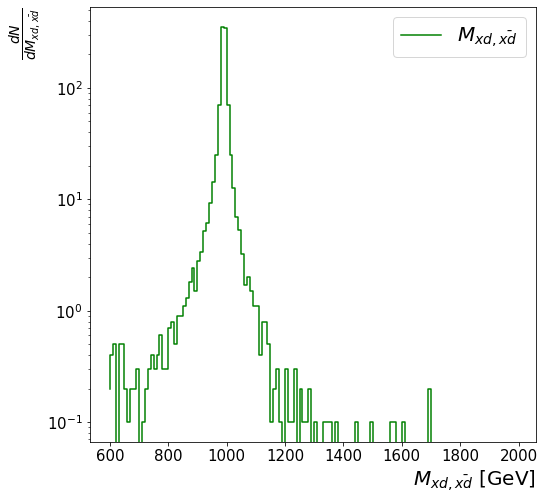

In [62]:
plt.figure(figsize=(8,8))  # plot size
 
bin_size = np.linspace(600,2000,141)
hist1000, bins = np.histogram(m1000, bins=bin_size)
plt.step(bins[:-1], hist1000.astype(np.float32)/10, color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

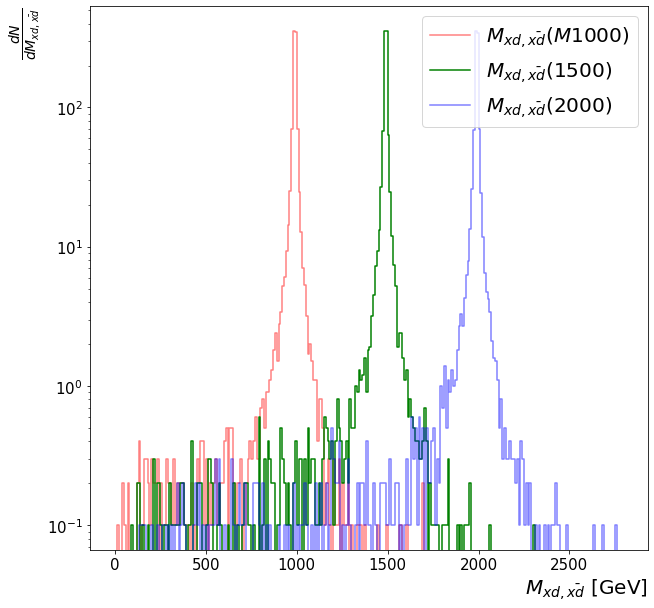

In [63]:
plt.figure(figsize=(10,10))  # plot size
 
bin_size = np.linspace(0,2800,281)
hist1000, bins = np.histogram(m1000, bins=bin_size)
hist1500, bins = np.histogram(m1500, bins=bin_size)
hist2000, bins = np.histogram(m2000, bins=bin_size)
plt.step(bins[:-1], hist1000.astype(np.float32)/10, color='red', alpha=0.5, label='$M_{xd,\\bar{xd}}(M1000)$')
plt.step(bins[:-1], hist1500.astype(np.float32)/10, color='green', label='$M_{xd,\\bar{xd}}(1500)$')
plt.step(bins[:-1], hist2000.astype(np.float32)/10, color='blue', alpha=0.5, label='$M_{xd,\\bar{xd}}(2000)$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Check Event Number

In [64]:
print(sum(hist1000))
print(sum(hist1500))
print(sum(hist2000))

10000
9999
10000


In [65]:
bin_size_2 = np.linspace(0,3300,331)
hist1500_2, bins = np.histogram(m1500, bins=bin_size_2)
print(sum(hist1500_2))

10000


## Compare with Google Slides

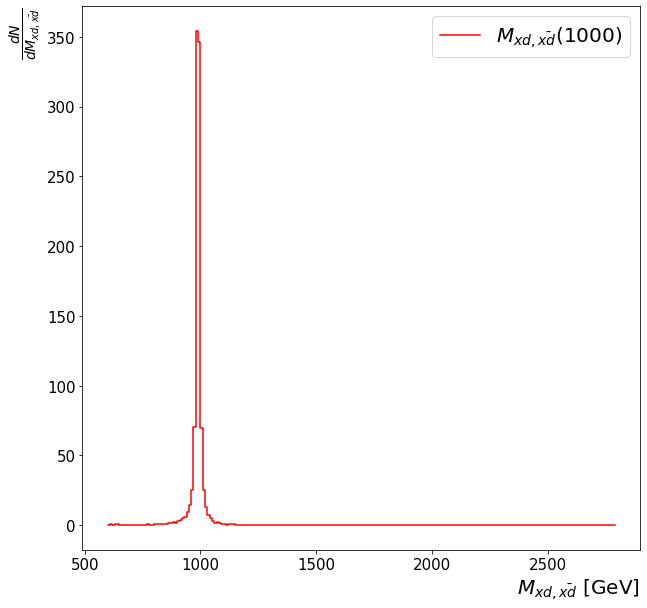

In [71]:
plt.figure(figsize=(10,10))  # plot size
 
bin_size = np.linspace(600,2800,221)
hist1000_GS, bins = np.histogram(m1000, bins=bin_size)
plt.step(bins[:-1], hist1000_GS.astype(np.float32)/10, color='red', label='$M_{xd,\\bar{xd}}(1000)$')

plt.legend(fontsize=20)
# plt.yscale('log')
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

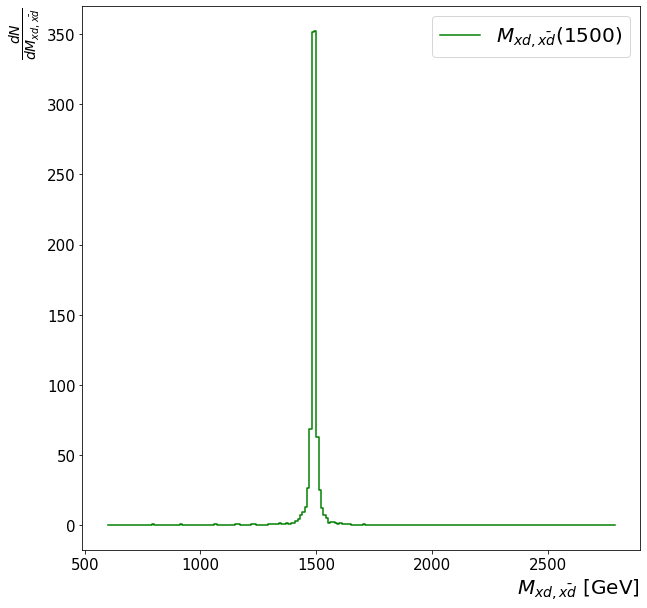

In [74]:
plt.figure(figsize=(10,10))  # plot size
 
bin_size = np.linspace(600,2800,221)
hist1500_GS, bins = np.histogram(m1500, bins=bin_size)
plt.step(bins[:-1], hist1500_GS.astype(np.float32)/10, color='green', label='$M_{xd,\\bar{xd}}(1500)$')

plt.legend(fontsize=20)
# plt.yscale('log')
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

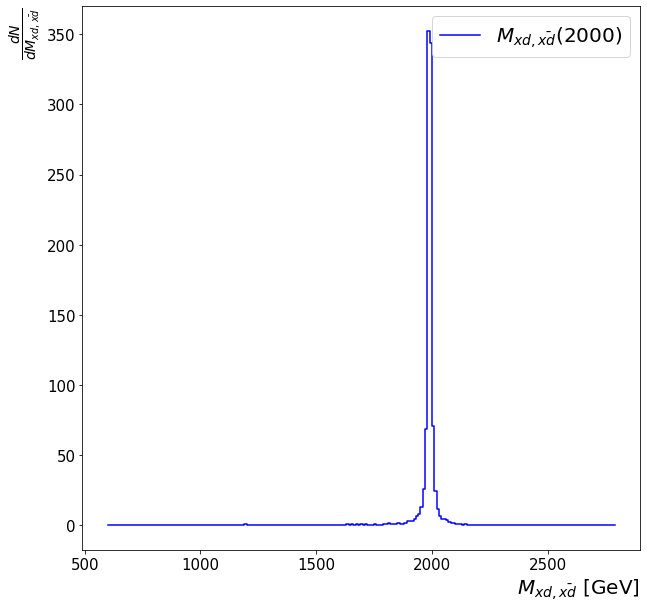

In [75]:
plt.figure(figsize=(10,10))  # plot size
 
bin_size = np.linspace(600,2800,221)
hist2000_GS, bins = np.histogram(m2000, bins=bin_size)
plt.step(bins[:-1], hist2000_GS.astype(np.float32)/10, color='blue', label='$M_{xd,\\bar{xd}}(2000)$')

plt.legend(fontsize=20)
# plt.yscale('log')
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [76]:
print(hist1000_GS)

[   2    4    5    0    5    5    2    1    2    2    3    0    1    2
    3    4    3    4    6    3    3    7    8    5    9    9   11   13
   18   24   15   28   34   52   61   93  143  251  703 3541 3463  699
  249  127   70   53   32   17   20   15   11   11    4    8    8    5
    1    2    3    1    0    3    1    1    3    0    2    1    1    2
    0    1    0    0    1    1    1    0    1    0    0    0    0    0
    0    1    0    0    0    0    1    0    0    0    0    0    0    1
    1    0    0    1    0    0    0    0    0    0    0    0    2    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [77]:
print(hist1000)

[   0    0    1    0    0    2    1    0    2    0    0    0    0    2
    4    0    1    3    3    2    1    3    2    2    3    0    2    1
    1    3    2    2    1    3    1    2    1    2    2    1    1    1
    0    2    1    0    3    2    4    4    1    3    0    2    1    2
    3    1    1    2    2    4    5    0    5    5    2    1    2    2
    3    0    1    2    3    4    3    4    6    3    3    7    8    5
    9    9   11   13   18   24   15   28   34   52   61   93  143  251
  703 3541 3463  699  249  127   70   53   32   17   20   15   11   11
    4    8    8    5    1    2    3    1    0    3    1    1    3    0
    2    1    1    2    0    1    0    0    1    1    1    0    1    0
    0    0    0    0    0    1    0    0    0    0    1    0    0    0
    0    0    0    1    1    0    0    1    0    0    0    0    0    0
    0    0    2    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 